<a href="https://www.kaggle.com/code/krviswanathan/airbnb-listings-in-nyc-data-analysis?scriptVersionId=115896586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction

Airbnb is a company that allows people to list and book accommodations in homes and apartments in various locations around the world. It was founded in 2008 and has become a popular alternative to traditional hotels. Using the Airbnb website or app, travelers can find and book unique and affordable places to stay in different locations.

In this notebook, we will analyze data on Airbnb listings in New York City to gain insights on the local short-term rental market. The data used in this analysis was sourced from the following website: http://insideairbnb.com/get-the-data/

The dataset contains information on 39881 Airbnb listings in New York City and has 41 features per listing.

# 2. The data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import json

plotly.offline.init_notebook_mode (connected = True)

pd.set_option('display.max_columns', None)

# Load the data
df = pd.read_csv('/kaggle/input/airbnb-listings-nyc/airbnb_listings_NY.csv')

# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 39881 non-null  int64  
 1   name                               39868 non-null  object 
 2   host_name                          39831 non-null  object 
 3   host_location                      32998 non-null  object 
 4   host_response_time                 26333 non-null  object 
 5   host_response_rate                 26333 non-null  object 
 6   host_acceptance_rate               28020 non-null  object 
 7   host_is_superhost                  39852 non-null  object 
 8   host_neighbourhood                 31650 non-null  object 
 9   host_has_profile_pic               39831 non-null  object 
 10  host_identity_verified             39831 non-null  object 
 11  neighbourhood                      39881 non-null  obj

In [2]:
# Summary of statistical information for the given dataset
df.iloc[:, 1:].describe().transpose()

count          mean           std  \
latitude                           39881.0     40.728870  5.862338e-02   
longitude                          39881.0    -73.945665  5.787026e-02   
accommodates                       39881.0      2.932549  1.996289e+00   
bedrooms                           36098.0      1.362264  7.304474e-01   
beds                               38997.0      1.641280  1.118583e+00   
minimum_nights                     39881.0     19.131742  3.143278e+01   
maximum_nights                     39881.0  55443.450666  1.075435e+07   
availability_30                    39881.0      5.582207  8.729975e+00   
availability_60                    39881.0     14.875154  1.972767e+01   
availability_90                    39881.0     27.022467  3.169021e+01   
availability_365                   39881.0    131.535669  1.385394e+02   
number_of_reviews                  39881.0     26.690855  5.625604e+01   
review_scores_rating               31519.0      4.627864  7.352186e-01   
review_scores_accuracy             31056.0      4.751268  4.650845e-01   
review_scores_cleanliness          31066.0      4.632340  5.423285e-01   
review_scores_checkin              31052.0      4.815535  4.145432e-01   
review_scores_communication        31061.0      4.810018  4.396304e-01   
review_scores_location             31049.0      4.742148  4.085895e-01   
review_scores_value                31049.0      4.651498  4.893023e-01   
host_listings_count                39881.0     16.931396  5.959714e+01   
host_listings_count_entire_homes   39881.0     10.309471  5.175390e+01   
host_listings_count_private_rooms  39881.0      6.486322  3.105968e+01   
host_listings_count_shared_rooms   39881.0      0.061884  6.775389e-01   
reviews_per_month                  31519.0      1.244733  1.991702e+00   

                                         min       25%         50%        75%  \
latitude                           40.500314  40.68776   40.724545    40.7632   
longitude                         -74.269520 -73.98334  -73.953710   -73.9256   
accommodates                        0.000000   2.00000    2.000000     4.0000   
bedrooms                            1.000000   1.00000    1.000000     2.0000   
beds                                1.000000   1.00000    1.000000     2.0000   
minimum_nights                      1.000000   2.00000   14.000000    30.0000   
maximum_nights                      1.000000  50.00000  365.000000  1125.0000   
availability_30                     0.000000   0.00000    0.000000     8.0000   
availability_60                     0.000000   0.00000    2.000000    30.0000   
availability_90                     0.000000   0.00000    8.000000    56.0000   
availability_365                    0.000000   0.00000   75.000000   277.0000   
number_of_reviews                   0.000000   1.00000    5.000000    25.0000   
review_scores_rating                0.000000   4.59000    4.830000     5.0000   
review_scores_accuracy              0.000000   4.71000    4.900000     5.0000   
review_scores_cleanliness           0.000000   4.50000    4.800000     5.0000   
review_scores_checkin               0.000000   4.80000    4.950000     5.0000   
review_scores_communication         0.000000   4.80000    4.960000     5.0000   
review_scores_location              0.000000   4.66000    4.860000     5.0000   
review_scores_value                 0.000000   4.56000    4.780000     4.9800   
host_listings_count                 1.000000   1.00000    1.000000     4.0000   
host_listings_count_entire_homes    0.000000   0.00000    1.000000     1.0000   
host_listings_count_private_rooms   0.000000   0.00000    0.000000     1.0000   
host_listings_count_shared_rooms    0.000000   0.00000    0.000000     0.0000   
reviews_per_month                   0.010000   0.14000    0.560000     1.7900   

                                            max  
latitude                           4.092881e+01  
longitude                         -7.369006e+01  
accommodat

# 3. Data Cleaning

In [3]:
df.head()

id                                      name host_name host_location  \
0   2539        Clean & quiet apt home by the park      John  New York, NY   
1   2595                     Skylit Midtown Castle  Jennifer  New York, NY   
2   5121                           BlissArtsSpace!     Garon  New York, NY   
3  45910        Beautiful Queens Brownstone! - 5BR      Mark  New York, NY   
4   5136  Spacious Brooklyn Duplex, Patio + Garden   Rebecca  New York, NY   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour               100%                  90%   
1       within a day                75%                  23%   
2     within an hour               100%                 100%   
3     within an hour               100%                  19%   
4                NaN                NaN                  33%   

  host_is_superhost  host_neighbourhood host_has_profile_pic  \
0                 f           Gravesend                    t   
1                 f             Midtown                    t   
2                 t  Bedford-Stuyvesant                    t   
3                 f           Ridgewood                    t   
4                 f   Greenwood Heights                    t   

  host_identity_verified       neighbourhood   district  latitude  longitude  \
0                      t          Kensington   Brooklyn  40.64529  -73.97238   
1                      t             Midtown  Manhattan  40.75356  -73.98559   
2                      t  Bedford-Stuyvesant   Brooklyn  40.68535  -73.95512   
3                      t           Ridgewood     Queens  40.70309  -73.89963   
4                      t         Sunset Park   Brooklyn  40.66265  -73.99454   

                 property_type        room_type  accommodates bathrooms_text  \
0  Private room in rental unit     Private room             2  1 shared bath   
1           Entire rental unit  Entire home/apt             1         1 bath   
2  Private room in rental unit     Private room             2            NaN   
3             Entire townhouse  Entire home/apt            16      2.5 baths   
4           Entire rental unit  Entire home/apt             4      1.5 baths   

   bedrooms  beds    price  minimum_nights  maximum_nights has_availability  \
0       1.0   1.0  $299.00              30             730                t   
1       NaN   1.0  $175.00              30            1125                t   
2       1.0   1.0   $60.00              30             730                t   
3       5.0  10.0  $425.00              30             730                t   
4       2.0   2.0  $275.00              21            1125                t   

   availability_30  availability_60  availability_90  availability_365  \
0               21               51               81               356   
1                0                0                5               280   
2                5               30               60               335   
3               30               60               90               365   
4                0                0                0               179   

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                  9                  4.89                    4.88   
1                 49                  4.68                    4.73   
2                 50                  4.52                    4.22   
3                 13                  4.42                    4.64   
4                  3                  5.00                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       5.00                   5.00   
1                       4.63                   4.77   
2                       4.09                   4.91   
3                       4.36                   4.82   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         5.00                    4.75

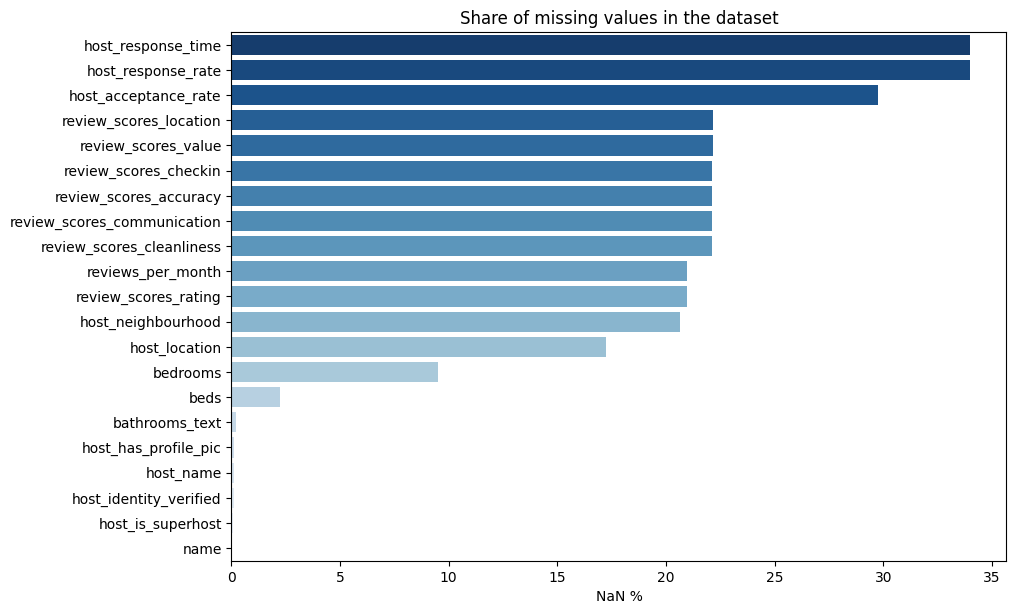

In [4]:
# Percentage of missing values in the dataset
perc_ser = (df.isnull().mean() * 100).sort_values(ascending=False)
perc_ser = perc_ser[perc_ser > 0]

plt.figure(figsize=(10, 7), dpi=100)
sns.barplot(x=perc_ser.values, y=perc_ser.index, palette='Blues_r')
plt.xlabel('NaN %')
plt.title('Share of missing values in the dataset');

In [5]:
# Removing '$' and ',' from the 'price' feature and convert it to float
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].apply(lambda val: val[1:]).astype('float')

# Replacing NaN in the following columns
for col in ['host_response_rate', 'host_acceptance_rate']:
    df[col] = df[col].fillna('0%')
    df[col] = df[col].str[:-1].astype('int')
    
    
nan_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
            'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

for col in nan_cols:
    df[col] = df[col].fillna(0)
    
# For missing values of host_name columns, most of the row values are also NaN.
# Can drop the rows for host_name == NaN
host_name_null_idx = df[df['host_name'].isnull()].index

df = df.drop(host_name_null_idx, axis=0).reset_index(drop=True)

df['name'] = df['name'].fillna('None')

df['host_location'] = df['host_location'].str.replace('Zürich, Switzerland', 'Zurich, Switzerland')

df['host_neighbourhood'] = df['host_neighbourhood'].fillna(df['neighbourhood'])

df['host_location'] = df['host_location'].fillna('New York, NY')

# Host Response Time: The response time is the average amount of time that it took for the host 
# to respond to all new messages in the past 30 days.
df['host_response_time'] = df['host_response_time'].fillna('no response')

In [6]:
perc_ser = df.isnull().mean() * 100
perc_ser[perc_ser > 0]

host_is_superhost    0.072808
bathrooms_text       0.210891
bedrooms             9.497627
beds                 2.219377
dtype: float64

**According to Airbnb:** 
* Superhosts have a 4.8 or higher average overall rating based on reviews from their Airbnb guests in the past year. Guests know they can expect outstanding hospitality from these Hosts.
* Superhosts have completed at least 10 stays in the past year or 100 nights over at least 3 completed stays. Your guests can feel confident staying with an experienced host.
* Superhosts respond to 90% of new messages within 24 hours. When guests ask you questions, they know that a quick response is only a message away.

In [7]:
# Based on the definition of superhosts given by Airbnb, 
# the missing values for this feature can be filled as follows:
mask = (df['host_response_rate'] >= 90) & (df['review_scores_rating'] >= 4.8)

df.loc[mask, 'host_is_superhost'] = df.loc[mask, 'host_is_superhost'].fillna('t')

df['host_is_superhost'] = df['host_is_superhost'].fillna('f')

# NaN values for 'bathrooms_text' can be filled as 0  
df['bathrooms_text'] = df['bathrooms_text'].fillna('0 baths')

# For bedrooms with NaN, mode value is used to fill.
df['bedrooms'] = df['bedrooms'].fillna(1.0)

mask1 = df['bedrooms'] == 1.0
mask2 = df['bedrooms'] > 1.0

# 'beds' feature
df.loc[mask1, 'beds'] = df.loc[mask1, 'beds'].fillna(df['bedrooms'])
df.loc[mask2, 'beds'] = df.loc[mask2, 'beds'].fillna(df['bedrooms'])

# No more missing values!
perc_ser = df.isnull().mean() * 100
perc_ser[perc_ser > 0]

Series([], dtype: float64)

In [8]:
# To have some consistency in reading the true or false class,
# the values 'f' and 't' are replaced with 'No' and 'Yes'
map_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']

for col in map_cols:
    df[col] = df[col].map({'f' : 'No', 't' : 'Yes'})

# 4. Data Analysis

In [9]:
df.head()

id                                      name host_name host_location  \
0   2539        Clean & quiet apt home by the park      John  New York, NY   
1   2595                     Skylit Midtown Castle  Jennifer  New York, NY   
2   5121                           BlissArtsSpace!     Garon  New York, NY   
3  45910        Beautiful Queens Brownstone! - 5BR      Mark  New York, NY   
4   5136  Spacious Brooklyn Duplex, Patio + Garden   Rebecca  New York, NY   

  host_response_time  host_response_rate  host_acceptance_rate  \
0     within an hour                 100                    90   
1       within a day                  75                    23   
2     within an hour                 100                   100   
3     within an hour                 100                    19   
4        no response                   0                    33   

  host_is_superhost  host_neighbourhood host_has_profile_pic  \
0                No           Gravesend                  Yes   
1                No             Midtown                  Yes   
2               Yes  Bedford-Stuyvesant                  Yes   
3                No           Ridgewood                  Yes   
4                No   Greenwood Heights                  Yes   

  host_identity_verified       neighbourhood   district  latitude  longitude  \
0                    Yes          Kensington   Brooklyn  40.64529  -73.97238   
1                    Yes             Midtown  Manhattan  40.75356  -73.98559   
2                    Yes  Bedford-Stuyvesant   Brooklyn  40.68535  -73.95512   
3                    Yes           Ridgewood     Queens  40.70309  -73.89963   
4                    Yes         Sunset Park   Brooklyn  40.66265  -73.99454   

                 property_type        room_type  accommodates bathrooms_text  \
0  Private room in rental unit     Private room             2  1 shared bath   
1           Entire rental unit  Entire home/apt             1         1 bath   
2  Private room in rental unit     Private room             2        0 baths   
3             Entire townhouse  Entire home/apt            16      2.5 baths   
4           Entire rental unit  Entire home/apt             4      1.5 baths   

   bedrooms  beds  price  minimum_nights  maximum_nights has_availability  \
0       1.0   1.0  299.0              30             730              Yes   
1       1.0   1.0  175.0              30            1125              Yes   
2       1.0   1.0   60.0              30             730              Yes   
3       5.0  10.0  425.0              30             730              Yes   
4       2.0   2.0  275.0              21            1125              Yes   

   availability_30  availability_60  availability_90  availability_365  \
0               21               51               81               356   
1                0                0                5               280   
2                5               30               60               335   
3               30               60               90               365   
4                0                0                0               179   

   number_of_reviews  review_scores_rating  review_scores_accuracy  \
0                  9                  4.89                    4.88   
1                 49                  4.68                    4.73   
2                 50                  4.52                    4.22   
3                 13                  4.42                    4.64   
4                  3                  5.00                    5.00   

   review_scores_cleanliness  review_scores_checkin  \
0                       5.00                   5.00   
1                       4.63                   4.77   
2                       4.09                   4.91   
3                       4.36                   4.82   
4                       5.00                   5.00   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         5.00                    4.75

### How quickly do Airbnb hosts respond?

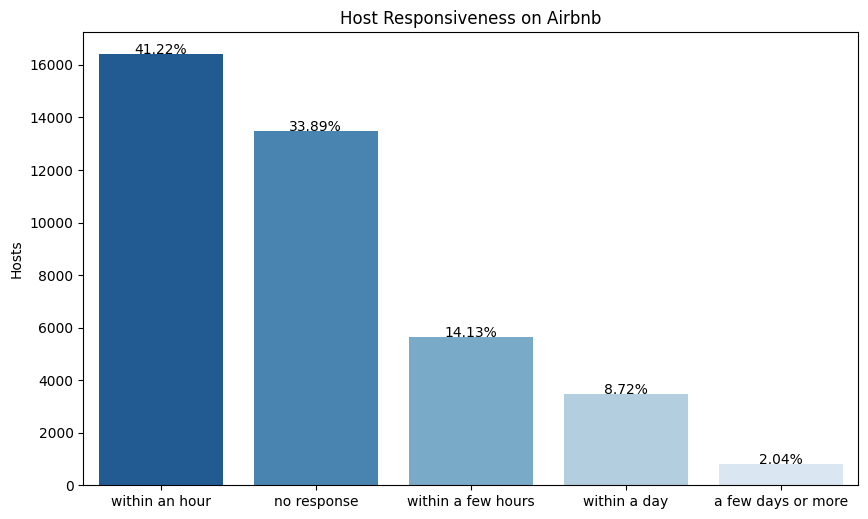

In [10]:
# Share of responses
host_resp_time = df['host_response_time'].value_counts().sort_values(ascending=False)
perc_resp = host_resp_time * 100/len(df)

fig, ax = plt.subplots(figsize=(10,6), dpi=100)
ax = sns.barplot(x=host_resp_time.index, y=host_resp_time.values, palette='Blues_r')
ax.set_xlabel('')
ax.set_ylabel('Hosts')
ax.set_title('Host Responsiveness on Airbnb')

patches = ax.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.5
    ax.annotate('{:.2f}%'.format(perc_resp[i]), (x, y), ha='center')

### Share of superhosts in the Airbnb host community

In [11]:
superhost_perc = df['host_is_superhost'].value_counts()

fig = px.pie(superhost_perc, values=superhost_perc.values, names=superhost_perc.index, hole=0.3,
             color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(textposition='inside', 
                  textinfo='label+percent', rotation=126)
fig.update_layout(showlegend=False)
fig.show()

### Share of listings per Boroughs

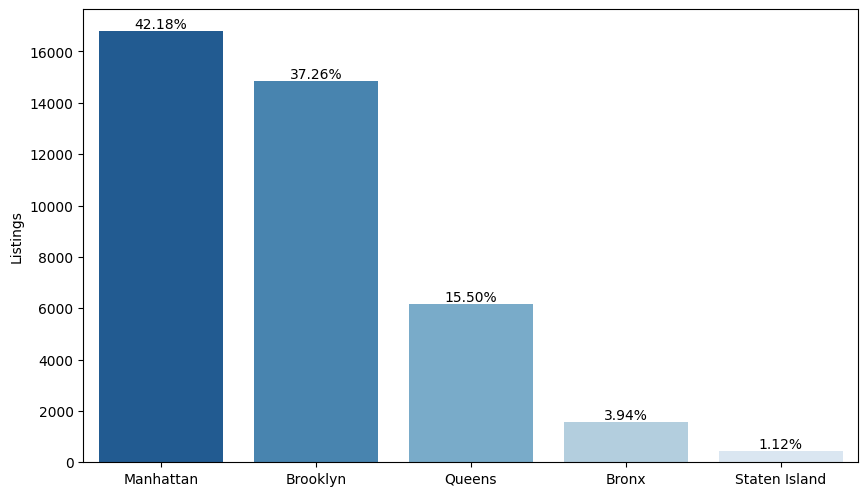

In [12]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.countplot(data=df, x='district', order = df['district'].value_counts().index, palette = 'Blues_r')
ax.set_xlabel('')
ax.set_ylabel('Listings')
patches = ax.patches
perc = df['district'].value_counts().sort_values(ascending=False) * 100 / len(df)
    
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+100
    ax.annotate('{:.2f}%'.format(perc[i]), (x, y), ha='center')

### Airbnb listings per neighborhood

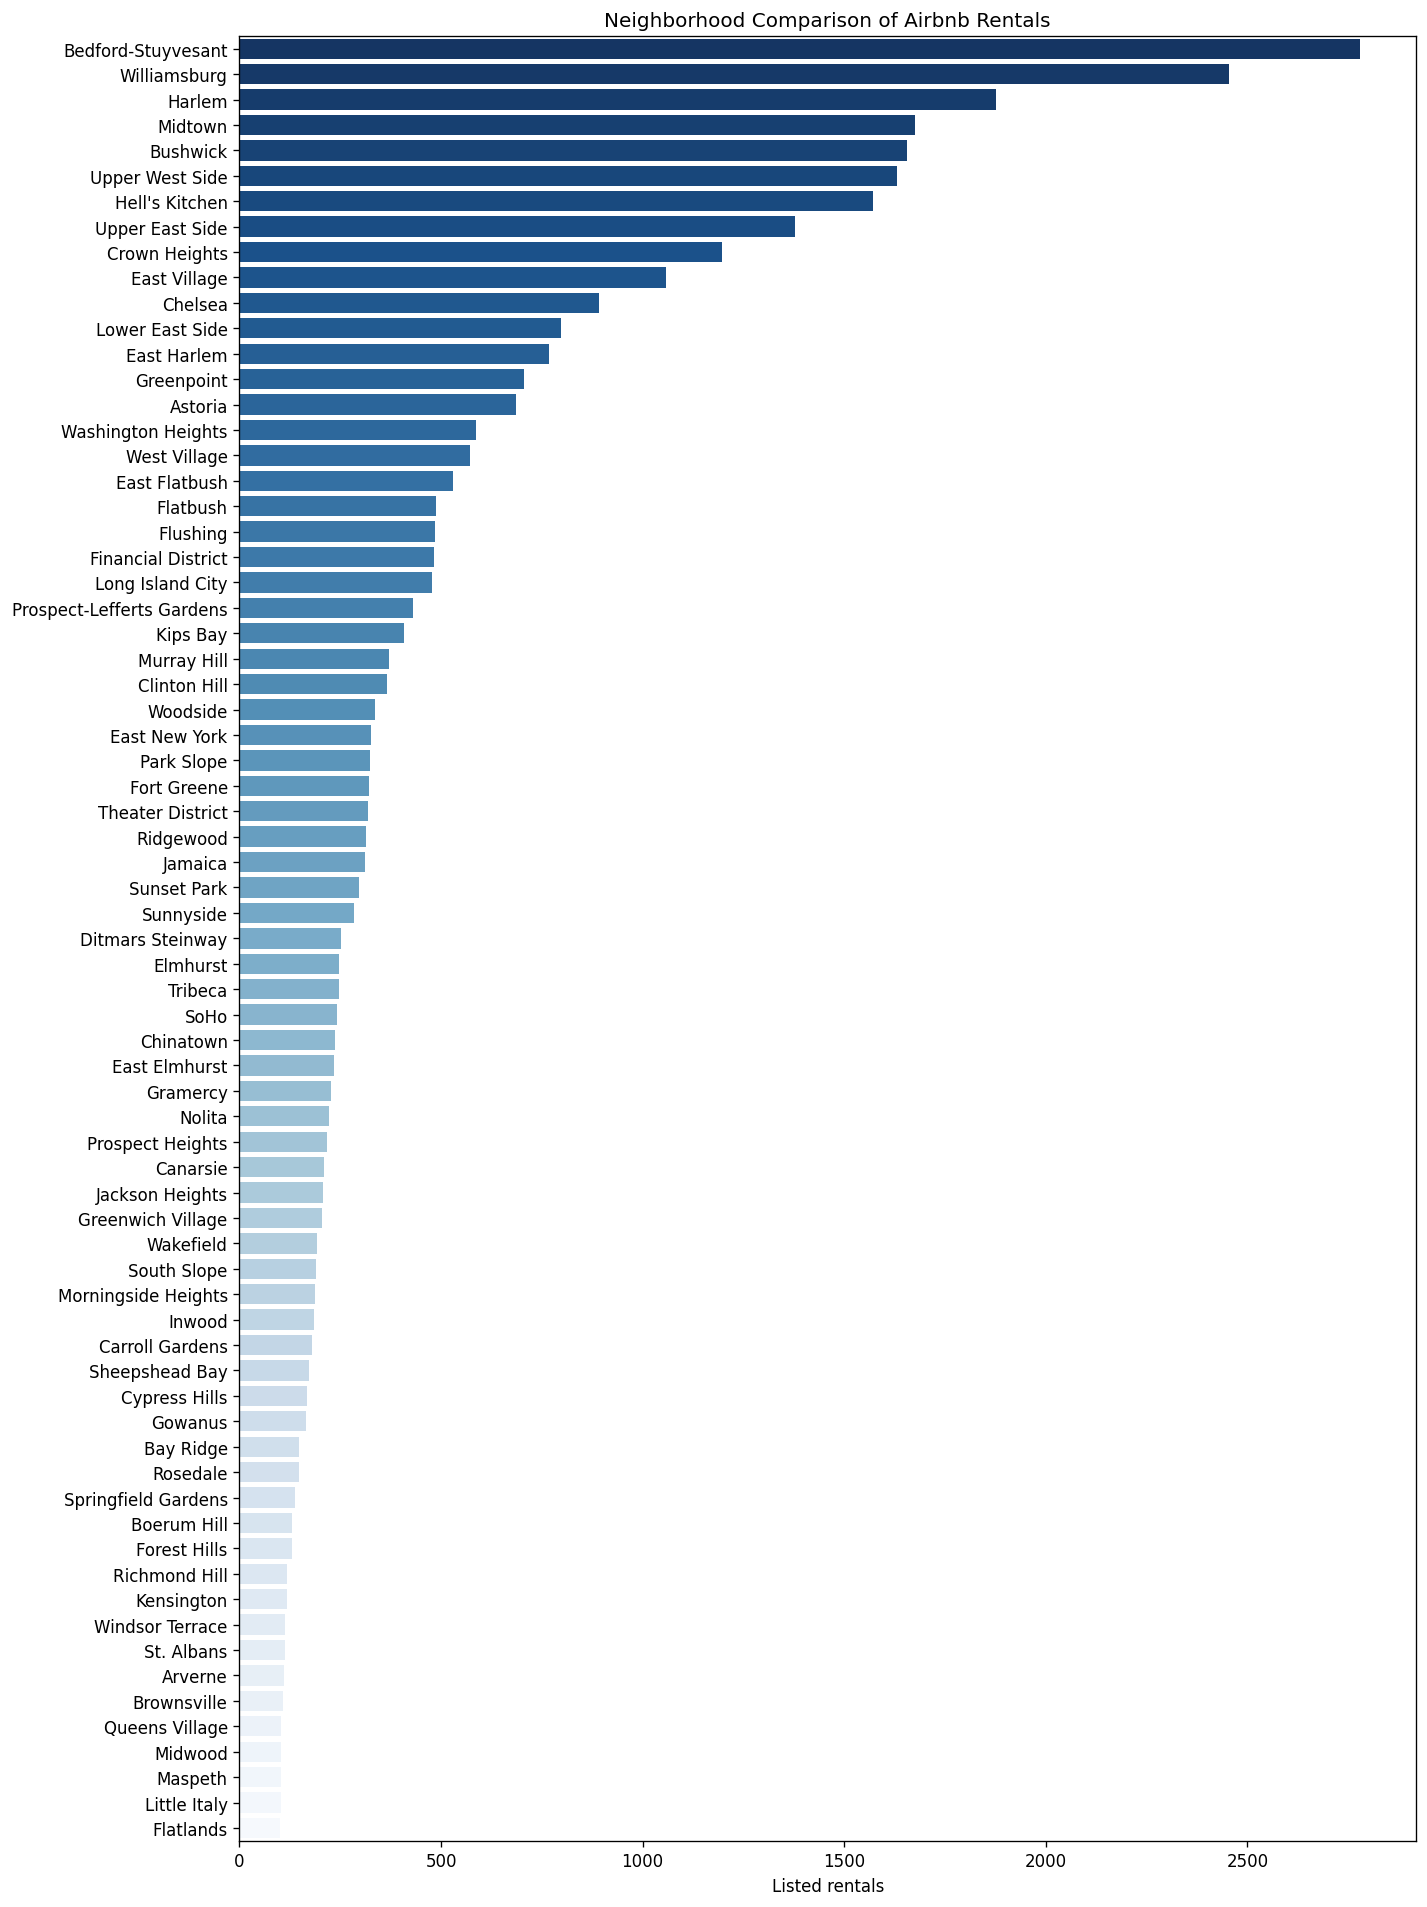

In [13]:
air_nbhood_50 = df['neighbourhood'].value_counts()
air_nbhood_50 = air_nbhood_50[air_nbhood_50 > 100]
plt.figure(figsize=(12,16), dpi=120)
sns.barplot(x=air_nbhood_50.values, y=air_nbhood_50.index, palette='Blues_r')
plt.xlabel('Listed rentals')
plt.title('Neighborhood Comparison of Airbnb Rentals')
plt.tight_layout();

### Average nightly rate of Airbnb rentals

In [14]:
avg_price = round(df['price'].mean(), 2)
print(f'Average price per night: ${avg_price}')

Average price per night: $197.21


### Airbnb rental price distribution

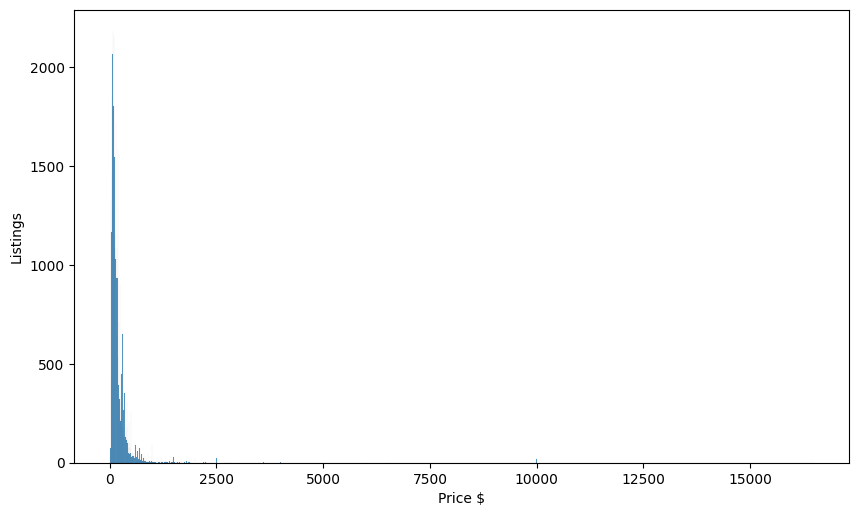

In [15]:
plt.figure(figsize=(10, 6), dpi=100)
sns.histplot(data=df, x='price')
plt.xlabel('Price $')
plt.ylabel('Listings');

### Price distribution of Airbnb rentals under \\$200

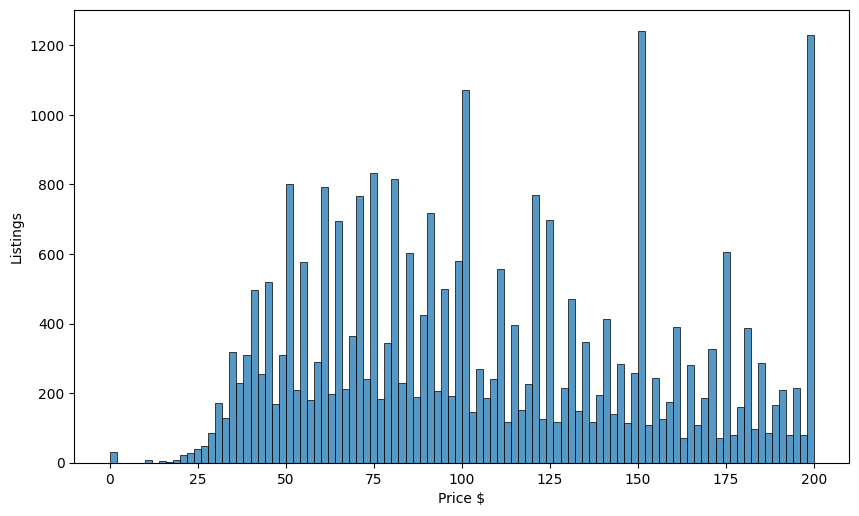

In [16]:
plt.figure(figsize=(10, 6), dpi=100)
sns.histplot(data=df, x='price', bins=100, binrange=[0, 200])
plt.xlabel('Price $')
plt.ylabel('Listings');

### Average nightly rate of rentals in the New York City Boroughs

In [17]:
nycmap = json.load(open('/kaggle/input/geo-json-map-of-nyc-boroughs/nyc.geojson'))

price_avg = df.groupby('district')['price'].mean().to_frame().reset_index()
price_avg = price_avg.rename(columns={'price' : 'Average Price', 'district' : 'Borough'})
price_avg['Average Price'] = price_avg['Average Price'].apply(lambda x: np.round(x, 2))

fig = px.choropleth_mapbox(data_frame=price_avg, 
                    locations='Borough',
                    geojson=nycmap, 
                    featureidkey='properties.boro_name',
                    color='Borough',
                    hover_name='Borough',
                    hover_data=['Average Price'],
                    )

fig.update_layout(mapbox_style="carto-positron", 
                  mapbox_zoom=8.2, 
                  mapbox_center = {"lat": 40.7, "lon": -74.01}, 
                  showlegend=False)


fig.show()

### Details of every listing in each Borough

In [18]:
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude',
                    size='price',
                    color='district',
                    hover_name='name',
                    hover_data=['neighbourhood'],
                    labels={'district' : 'Borough', 'neighbourhood' : 'Neighborhood', 'price' : 'Price'},
                    color_continuous_scale=px.colors.qualitative.D3)
    
fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=8.8, mapbox_center = {"lat": 40.72, "lon": -74.01})


fig.show()

### Average price per night in the neighborhood of NYC

In [19]:
price_nhood_df = df.groupby(['district', 'neighbourhood'])['price'].mean().to_frame()
price_nhood_df = price_nhood_df.reset_index()

# Sunburst chart for displaying the average price per night in the neighborhood
fig = px.sunburst(price_nhood_df, path=['district', 'neighbourhood'], 
                  values='price', color='district',
                  color_discrete_sequence=px.colors.qualitative.Set1, width=800, height=800)
fig.show()

### Profile picture and identity verification status of Airbnb hosts

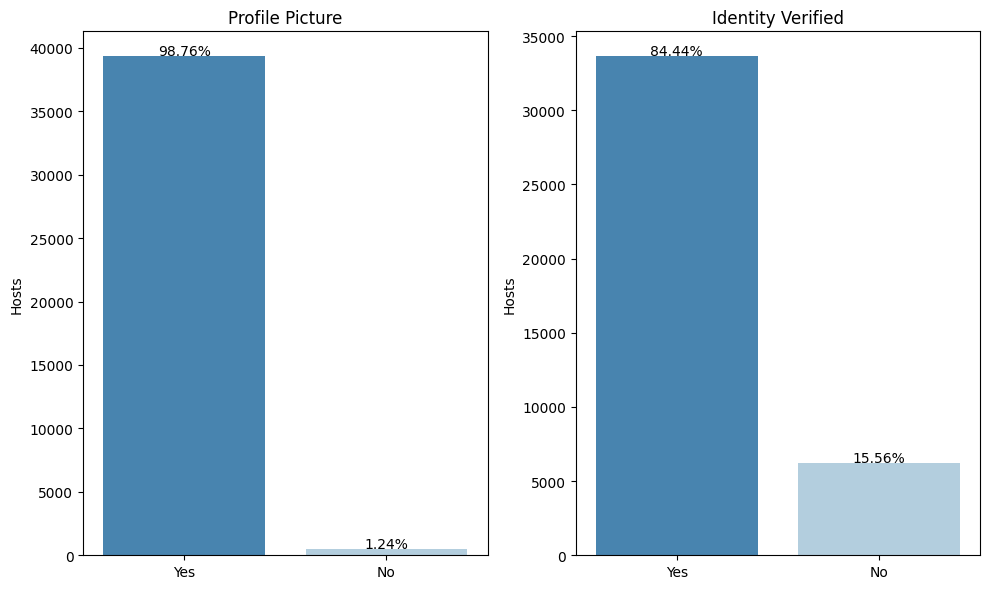

In [20]:
# Hosts identity
host_cols = ['host_has_profile_pic', 'host_identity_verified']
title_cols = ['Profile Picture', 'Identity Verified']

fig, ax = plt.subplots(1, 2, figsize=(10,6), dpi=100)

for ax, col, t in list(zip(ax.ravel(), host_cols, title_cols)):
    sns.countplot(data=df, x=col, palette='Blues_r', ax=ax)
    ax.set_ylabel('Hosts')
    ax.set_xlabel('')
    ax.set_title(t)
    
    patches = ax.patches
    perc = df[col].value_counts() * 100 / len(df)
    
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+100
        ax.annotate('{:.2f}%'.format(perc[i]), (x, y), ha='center')
plt.tight_layout()
    

### Distribution of different types of listings

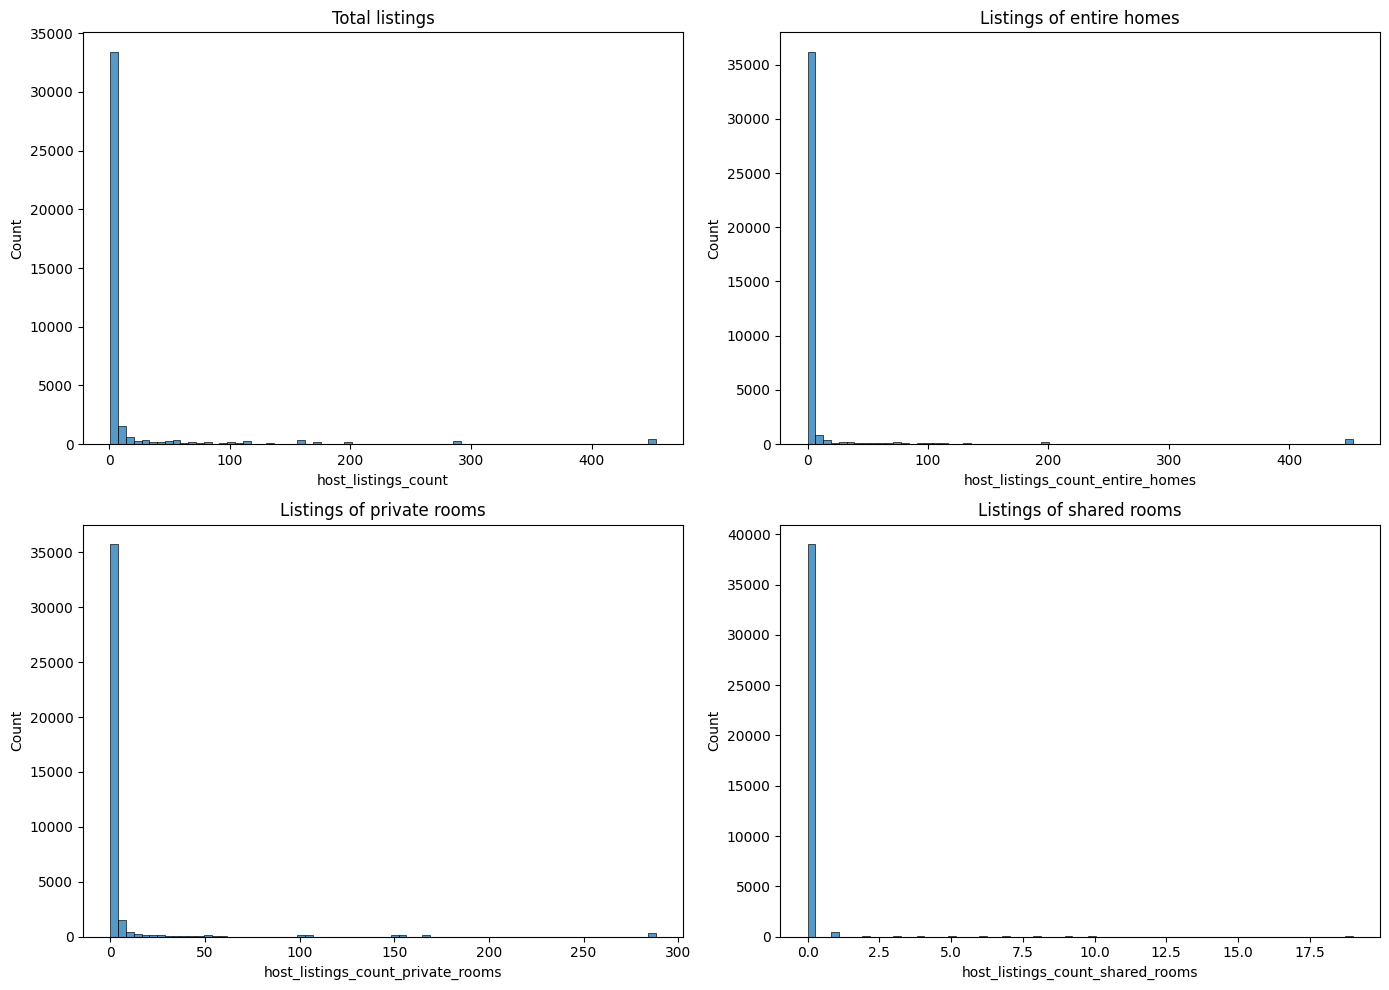

In [21]:
listings_cols = ['host_listings_count', 'host_listings_count_entire_homes', 
                 'host_listings_count_private_rooms', 'host_listings_count_shared_rooms']

title_cols = ['Total listings', 'Listings of entire homes', 
              'Listings of private rooms', 'Listings of shared rooms']

fig, ax = plt.subplots(2, 2, figsize=(14, 10), dpi=100)

for ax, col, t in list(zip(ax.ravel(), listings_cols, title_cols)):
    sns.histplot(data=df, x=col, palette='Blues_r', ax=ax, bins=70)
    ax.set_ylabel('Count')
    ax.set_xlabel(col)
    ax.set_title(t)
plt.tight_layout()

### Distribution analysis of listing types

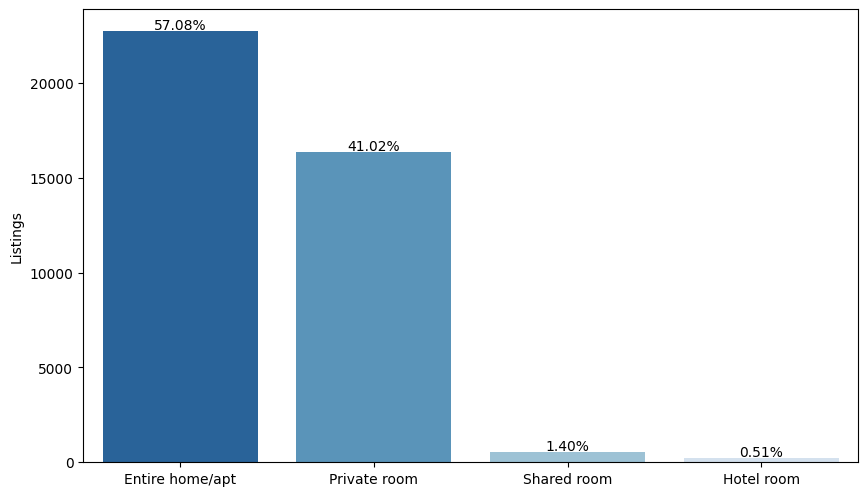

In [22]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.countplot(data=df, x='room_type', order = df['room_type'].value_counts().index, palette = 'Blues_r')
ax.set_xlabel('')
ax.set_ylabel('Listings')
patches = ax.patches
perc = df['room_type'].value_counts().sort_values(ascending=False) * 100 / len(df)
    
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+100
    ax.annotate('{:.2f}%'.format(perc[i]), (x, y), ha='center')

### Minimum nights required for stay

From the distribution of listings for minimum night requirements, the listings can be divided into short-term rentals (less than 30 nights) and long-term rentals (greater than 30 nights).

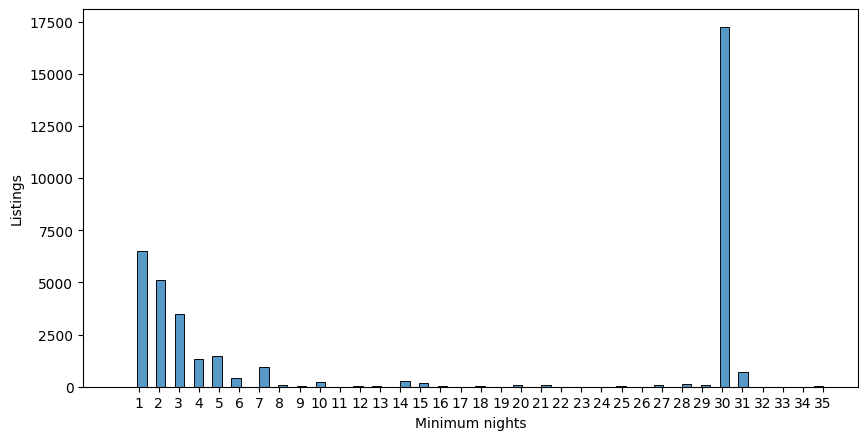

In [23]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(data=df, x='minimum_nights', bins=75, binrange=[0, 35])
plt.xlabel('Minimum nights')
plt.ylabel('Listings')
#plt.title('Minimum nights for listbings')
plt.xticks(np.arange(1, 36));

In [24]:
# Short-term rentals and its share
short_term_rentals_c = len(df[df['minimum_nights'] < 30]['minimum_nights'])
short_term_rentals_p = round(100 * short_term_rentals_c / len(df), 2)
print(f'Short-term rentals: {short_term_rentals_c} listings ({short_term_rentals_p}%)')

# Long-term rentals and its share
long_term_rentals_c = len(df[df['minimum_nights'] >= 30]['minimum_nights'])
long_term_rentals_p = round(100 * long_term_rentals_c / len(df), 2)
print(f'Long-term rentals: {long_term_rentals_c} listings ({long_term_rentals_p}%)')

Short-term rentals: 20731 listings (52.05%)
Long-term rentals: 19100 listings (47.95%)


### Listings per host

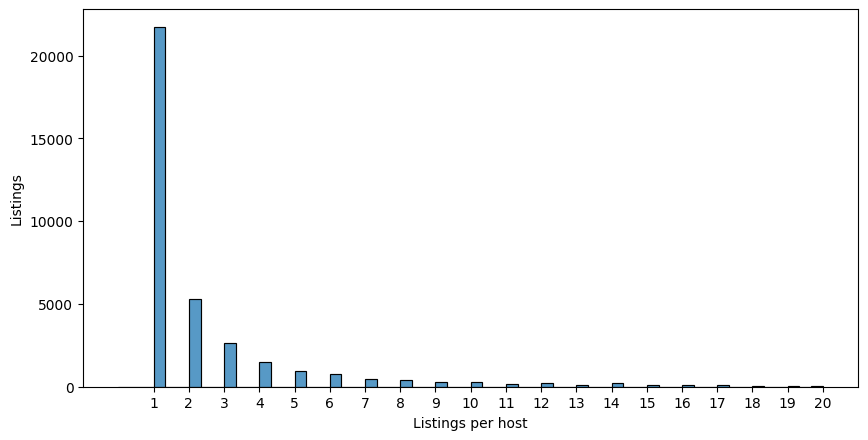

In [25]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df, x='host_listings_count', bins=60, binrange=[0, 20], stat='count')
plt.xlabel('Listings per host')
plt.ylabel('Listings')
plt.xticks(np.arange(1, 21));

In [26]:
# Single listings and its share
single_listings_c = len(df[df['host_listings_count'] == 1.0]['host_listings_count'])
single_listings_p = round(100 * single_listings_c / len(df), 2)
print(f'Single listings: {single_listings_c} listings ({single_listings_p}%)')

# Multiple listings and its share
multiple_listings_c = len(df[df['host_listings_count'] > 1.0]['host_listings_count'])
multiple_listings_p = round(100 * multiple_listings_c / len(df), 2)
print(f'Multiple listings: {multiple_listings_c} listings ({multiple_listings_p}%)')

Single listings: 21719 listings (54.53%)
Multiple listings: 18112 listings (45.47%)


### Total listings per host

In [27]:
hosts_room_count = df.pivot_table(index='host_name', columns='room_type', aggfunc='size', fill_value=0)

hosts_room_count = hosts_room_count.rename_axis(None, axis=1)

hosts_room_count['total_listings'] = hosts_room_count.sum(axis=1) # row-wise sum of all column values

top_hosts_listings = hosts_room_count.sort_values(by=['total_listings'], ascending=False)

# Top 10 hosts based on total number of listings
top_hosts_listings.head(10)

Entire home/apt  Hotel room  Private room  Shared room  \
host_name                                                            
Blueground              453           0             0            0   
Michael                 218           0           101            2   
Eugene                    7           0           292            0   
David                   173           0           106            2   
Untitled                197           0             3            0   
John                    109           0            84            7   
Michelle                 75           0           108            1   
Daniel                  131           0            50            1   
Hiroki                    7           0           168            0   
Alex                    102           0            64            3   

            total_listings  
host_name                   
Blueground             453  
Michael                321  
Eugene                 299  
David                  281  
Untitled               200  
John                   200  
Michelle               184  
Daniel                 182  
Hiroki                 175  
Alex                   169

### Availability and instant booking options

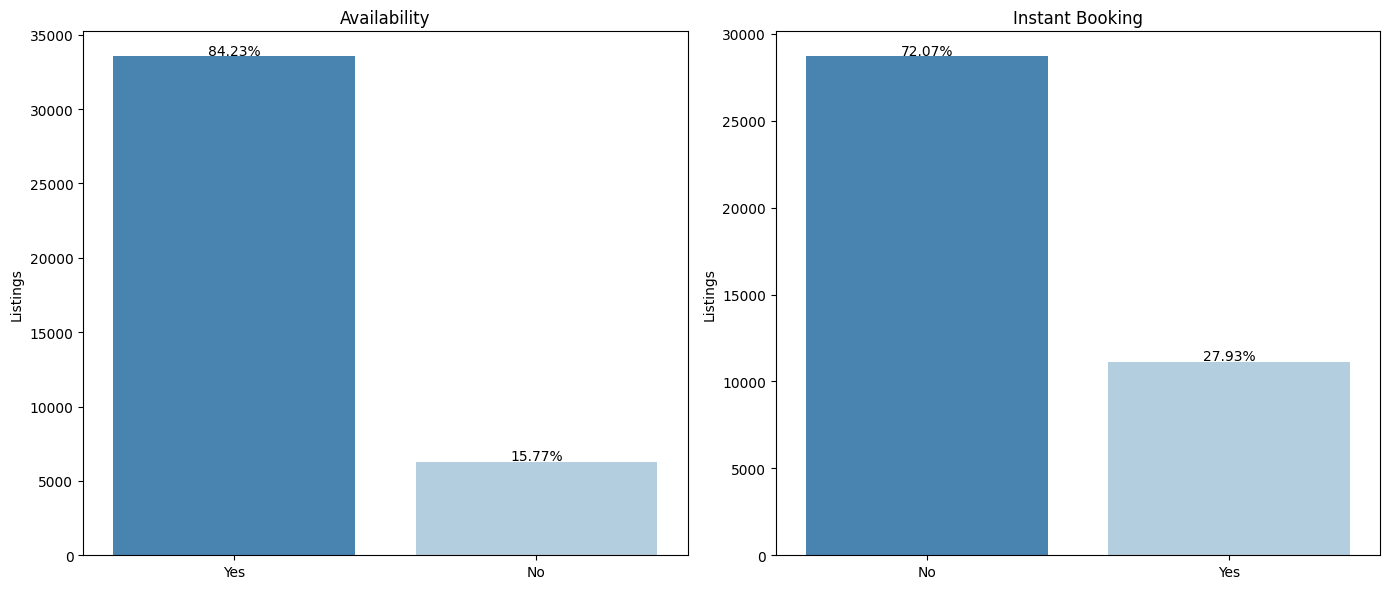

In [28]:
host_cols = ['has_availability', 'instant_bookable']
title_cols = ['Availability', 'Instant Booking']

fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

for ax, col, t in list(zip(ax.ravel(), host_cols, title_cols)):
    sns.countplot(data=df, x=col, palette='Blues_r', ax=ax)
    ax.set_ylabel('Listings')
    ax.set_xlabel('')
    ax.set_title(t)
    
    patches = ax.patches
    perc = df[col].value_counts() * 100 / len(df)
    
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+100
        ax.annotate('{:.2f}%'.format(perc[i]), (x, y), ha='center')
plt.tight_layout()

# 5. Conclusion

* The data analysis of Airbnb listings in New York revealed several interesting insights. 


* Firstly, the majority of Airbnb listings in New York City are located in Manhattan, with Brooklyn coming in second place.


* The most popular neighborhood for Airbnb rentals is Bedford-Stuyvesant, followed by Williamsburg, Harlem, Midtown, and Bushwick. 


* The analysis of Airbnb rental data in New York City found that the average price per night is \\$197.21, with a range of prices from as low as \\$10 for a shared or private room to as high as \\$16,000 for a private room in a boutique hotel that can accommodate up to 14 people in Manhattan.

# 6. Reference

* Airbnb New York Dataset: http://insideairbnb.com/get-the-data/


* Airbnb Superhosts: https://www.airbnb.co.in/d/superhost


* NYC GeoJSON: https://gist.github.com/ix4/6f44e559b29a72c4c5d130ac13aad317?short_path=467dc07